<a href="https://www.kaggle.com/code/saifuddinrakib/titanic-machine-learning?scriptVersionId=163476296" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer  # Fixing typo: Simplelmputer to SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier  # Fixing typo: RandomForestC1assif1er to RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  # Fixing typo: DecisionTreeC1assifier to DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  # Fixing typo: KNeighborsC1assifier to KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  # Fixing typo: Gauss1anNB to GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-explorer/train.csv
/kaggle/input/data-explorer/test.csv
/kaggle/input/data-explorer/gender_submission.csv


In [2]:
# Assuming your dataset is a CSV file named 'train.csv'
train_data = pd.read_csv('/kaggle/input/data-explorer/train.csv')


**Exploratory Data Analysis**

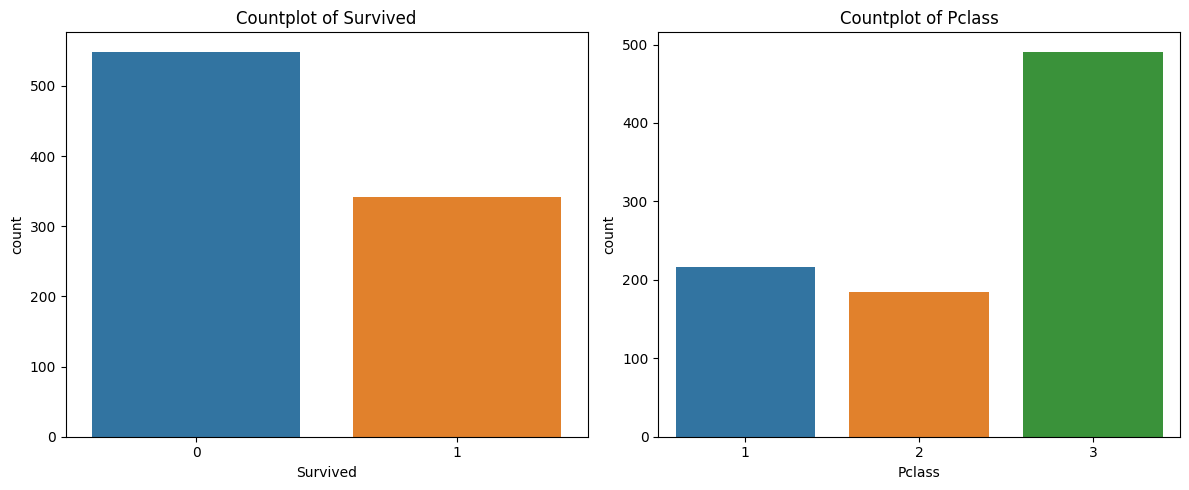

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame named 'train_data'
# Example: train_data = pd.read_csv('your_dataset.csv')

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Countplot for 'Survived'
sns.countplot(data=train_data, x='Survived', ax=axes[0])
axes[0].set_title('Countplot of Survived')

# Countplot for 'Pclass'
sns.countplot(data=train_data, x='Pclass', ax=axes[1])
axes[1].set_title('Countplot of Pclass')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


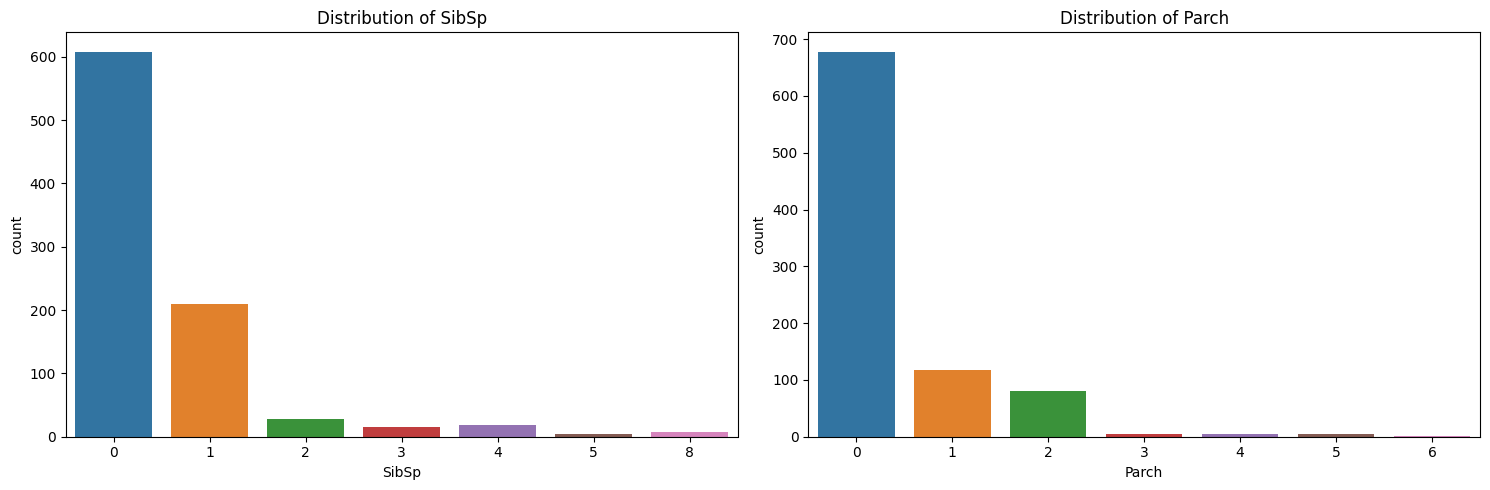

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=train_data, x='SibSp', ax=axes[0])
axes[0].set_title('Distribution of SibSp')

sns.countplot(data=train_data, x='Parch', ax=axes[1])
axes[1].set_title('Distribution of Parch')

plt.tight_layout()
plt.show()

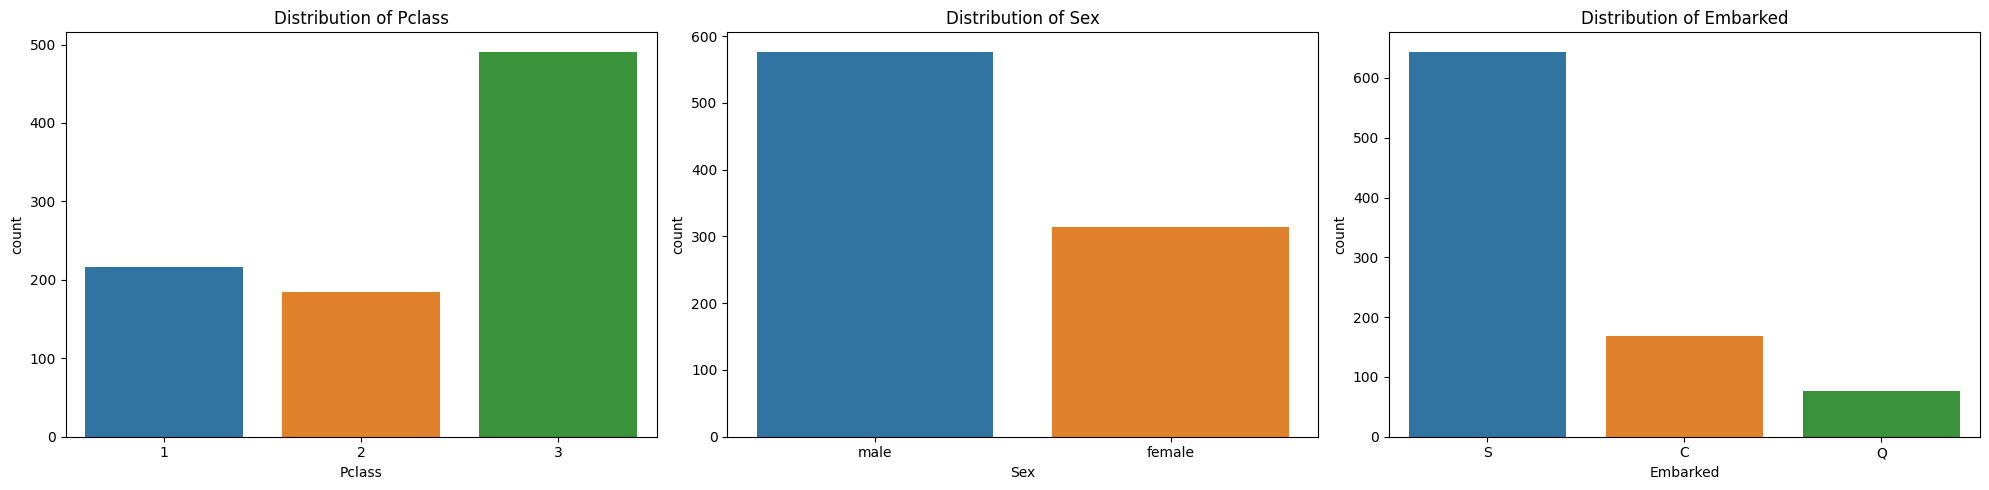

In [5]:
# Cell 3: Distribution of 'Pclass', 'Sex', and 'Embarked'
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.countplot(data=train_data, x='Pclass', ax=axes[0])
axes[0].set_title('Distribution of Pclass')

sns.countplot(data=train_data, x='Sex', ax=axes[1])
axes[1].set_title('Distribution of Sex')

sns.countplot(data=train_data, x='Embarked', ax=axes[2])
axes[2].set_title('Distribution of Embarked')

plt.tight_layout()
plt.show()

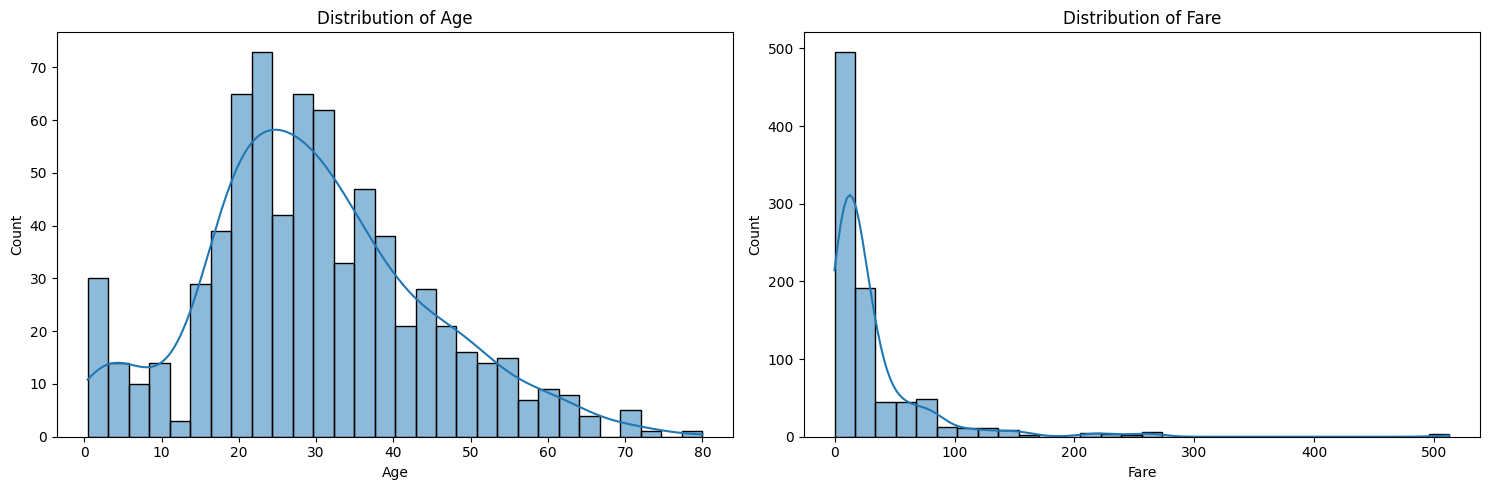

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=train_data, x='Age', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')

sns.histplot(data=train_data, x='Fare', bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Fare')

plt.tight_layout()
plt.show()

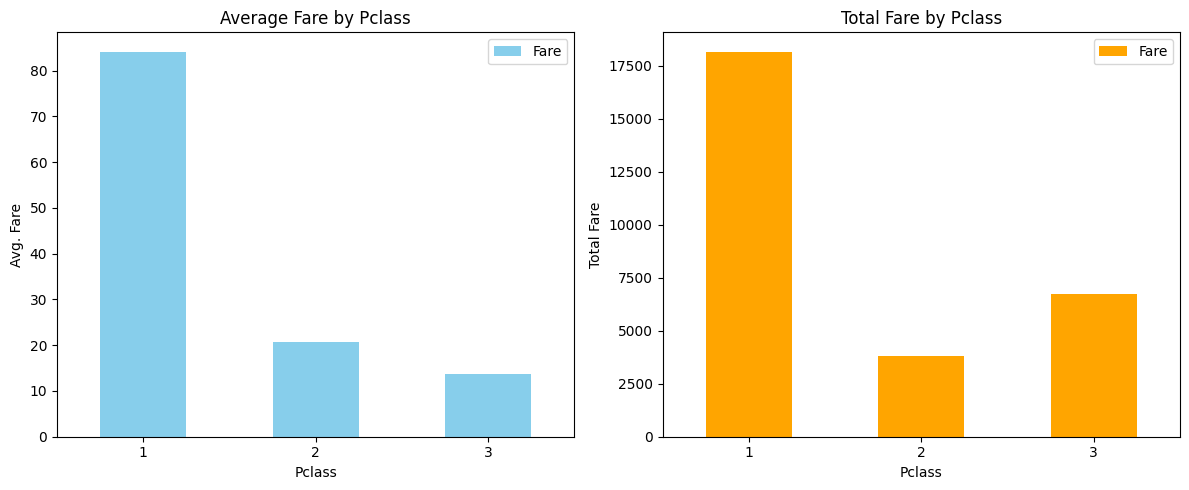

In [7]:

# Assuming you have loaded your training dataset into a DataFrame named 'train_data'
# Example: train_data = pd.read_csv('train_dataset.csv')

# Calculate average fare by Pclass
class_avg_fare = train_data.pivot_table(index='Pclass', values='Fare')
# Calculate total fare by Pclass
class_total_fare = train_data.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Barplot for average fare by Pclass
class_avg_fare.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Average Fare by Pclass')
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Avg. Fare')
axes[0].tick_params(axis='x', rotation=0)

# Barplot for total fare by Pclass
class_total_fare.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Total Fare by Pclass')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Total Fare')
axes[1].tick_params(axis='x', rotation=0)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


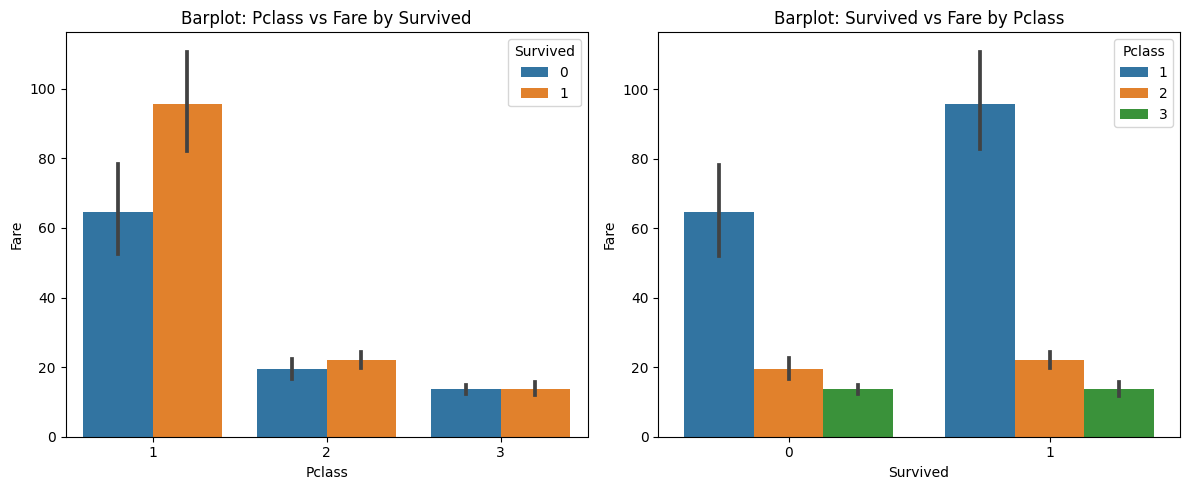

In [8]:

# Assuming you have loaded your training dataset into a DataFrame named 'train_data'
# Example: train_data = pd.read_csv('train_dataset.csv')

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Barplot for 'Pclass' and 'Fare' by 'Survived'
sns.barplot(data=train_data, x='Pclass', y='Fare', hue='Survived', ax=axes[0])
axes[0].set_title('Barplot: Pclass vs Fare by Survived')

# Barplot for 'Survived' and 'Fare' by 'Pclass'
sns.barplot(data=train_data, x='Survived', y='Fare', hue='Pclass', ax=axes[1])
axes[1].set_title('Barplot: Survived vs Fare by Pclass')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


# Data Preprocessing

Training data-890
, Testing data-417


In [9]:
train_data = pd.read_csv("/kaggle/input/data-explorer/train.csv")
test_data = pd.read_csv("/kaggle/input/data-explorer/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [13]:
print("Train Data set shape",train_data.shape)
print("Test Data set shape",test_data.shape)

Train Data set shape (891, 12)
Test Data set shape (418, 11)


In [14]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [15]:
train_data.info()
print('_'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

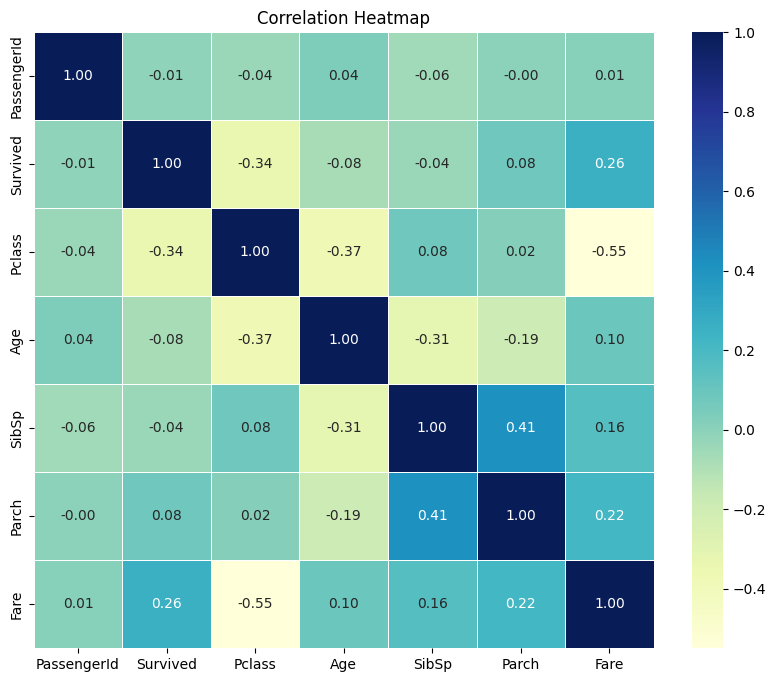

In [16]:

# Assuming you have a DataFrame called 'train_data'
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming 'train_data' is your DataFrame
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_indices, test_indices in split.split(train_data, train_data["Survived"]):
    strat_train_set = train_data.loc[train_indices]
    strat_test_set = train_data.loc[test_indices]



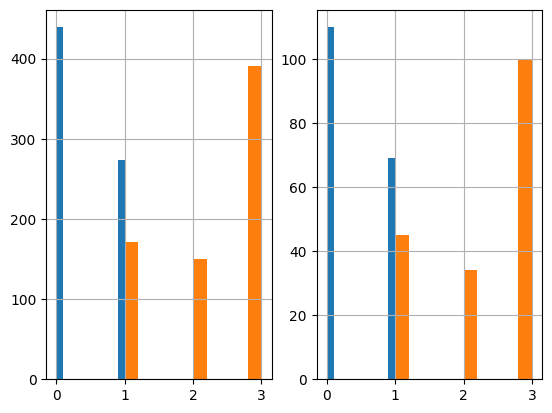

In [18]:
plt.subplot (1,2,1)
strat_train_set ['Survived'].hist()
strat_train_set ['Pclass'].hist()

plt.subplot (1,2,2)
strat_test_set ['Survived'].hist()
strat_test_set ['Pclass'].hist()
plt.show()

In [19]:
strat_train_set.info()



<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          575 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB
